<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#LyricsManager.py" data-toc-modified-id="LyricsManager.py-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LyricsManager.py</a></span></li><li><span><a href="#MoodyLyrics-issue" data-toc-modified-id="MoodyLyrics-issue-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MoodyLyrics issue</a></span></li><li><span><a href="#New-features" data-toc-modified-id="New-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>New features</a></span><ul class="toc-item"><li><span><a href="#Dataset-Stats" data-toc-modified-id="Dataset-Stats-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dataset Stats</a></span></li><li><span><a href="#Artificial-Neural-Network" data-toc-modified-id="Artificial-Neural-Network-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Artificial Neural Network</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Gradient Boost</a></span></li></ul></li></ul></div>

In [2]:
import spacy
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from utils.datasets import load_dataset_from_path, split_train_validation

# Introduction
**Previously on Sara&Mario project**: 
<ol>
    <li>*MoodyLyrics* stats analysis</li>
    <li>Lyrics classification using the main classifiers</li>
    <li>Emotion classification by just considering the song title</li> 
</ol>
Now, following the last meeting discussion we: 
<ol>
    <li>Wrote a script to create the dataset *SpotifyURI*, *List of PlaylistIDs*, *MoodyLyric_Emotion*</li>
    <li>Wrote a script to detect all duplicated songs in MoodyLyrics to fill a bug report</li>
    <li>Added new features for the classification task</li>
</ol>

# LyricsManager.py
After downloading the Spotify RecSys Challenge dataset we wrote a script that: <br>
<ul>
    <li>Given as input: the *Spotify playlist dataset folder*, and an output folder, creates a data structure to store for each song:<br>
        <*SpotifyURI*, *PlaylistIDs*, *TrackInformation*, *Emotion*><br>
        where: 
            <ul>
                <li>*SpotifyURI* is the songID</li>
                <li>*PlaylistsIDs* is the list of playlist in which the song appear</li>
                <li>*TrackInformation* is the list of information taken from Spotify dataset</li>
                <li>*Emotion* is an optional field, present only if the song is also contained in the MoodyLyrics dataset, that contains the emotion label for the song
    </li>
            </ul>
      <li>Can load Spotify songs datastructure (if already existing)</li>
            <li>Given as input a SpotifyURI it can download lyrics from lyricwikia</li>
</ul>

# MoodyLyrics issue
New week we detected duplicate information in MoodyLyrics. Now we can generate a .csv file capable of reporting those duplicates.

Now it's time to fill a bug.

# New features
Starting from MoodyLyrics we are going to create a new dataset with a lot of new features. <br>
<ul>
    <li>**Title_vector**</li>
    <li>**Lyric_vector**</li>
    <li>**%Rhymes**:<br> defined as the percentage of the number of rhymes over the number of total lines. A rhyme is defined as a rhyme between two following lines.</li>
    <li>**%Past_tense_verbs**:<br> defined as the the percentage of the number of past tense verbs over the total number of verbs.</li>
    <li>**%Present_tense_verbs**:<br>  defined as the the percentage of the number of present tense verbs over the total number of verbs.</li>
    <li>**%Future_tense_verbs**:<br>  defined as the the percentage of the number of future tense verbs over the total number of verbs, where future is just will + base form.</li>
    <li>**%ADJ**:<br> Percentage of adjectives over the total number of words.</li>
    <li>**%ADP**:<br> Percentage of adpositions (e.g. in, to, during) over the total number of words.</li>
    <li>**%ADV**:<br> Percentage of adverbs (e.g. very, tomorrow, down, where, there) over the total number of words.</li>
    <li>**%AUX**:<br> Percentage of auxiliaries (e.g. is, has (done), will (do), should (do)) over the total number of words.</li>
    <li>**%INTJ**:<br> Percentage of interjections (e.g. psst, ouch, bravo, hello) over the total number of words.</li>
    <li>**%NOUN**:<br> Percentage of nouns over the total number of words.</li>
    <li>**%NUM**:<br> Percentage of numerals over the total number of words.</li>
    <li>**%PRON**:<br> Percentage of pronouns (e.g. I, you, he, she, myself, themselves, somebody,...) over the total number of words.</li> 
    <li>**%PROPN**:<br> Percentage of proper nouns (e.g. Mary, John) over the total number of words.</li>
    <li>**%PUNCT**:<br> Percentage of puntuctuation (e.g. ., (, ), ?) over the total number of words.</li>
    <li>**%VERB**:<br> Percentage of verbs over the total number of words.</li>
    <li>**Selfish_degree**:<br> Percentage of 'I' pronouns over the total number of pronouns</li>
    <li>**%Echoism**:<br> Percentage of echoism over the total number of words, where an echoism is either a sequence of two subsequent repeated words or the repetition of a vowel in a word. </li>
    <li>**%Duplicates**:<br> Percentage of duplicate words over the total number of words</li>
    <li>**isTitleInLyric**:<br> Boolean, true if the title string is also a substring of the lyric</li>
</ul>


## Dataset Stats

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./datasets/moodylyrics_featurized.csv')
dataset.columns = ['ID', 'ARTIST', 'SONG_TITLE', 'LYRICS_VECTOR', 'TITLE_VECTOR', 
                   'LINE_COUNT', 'WORD_COUNT', 'ECHOISMS', 'SELFISH_DEGREE', 
                   'DUPLICATE_LINES', 'IS_TITLE_IN_LYRICS', 'RHYMES', 'VERB_PRESENT', 
                   'VERB_PAST', 'VERB_FUTURE', 'ADJ_FREQUENCIES', 'CONJUCTION_FREQUENCIES', 
                   'ADV_FREQUENCIES', 'AUX_FREQUENCIES', 'CONJ_FREQUENCIES', 'CCONJ_FREQUENCIES', 
                   'DETERMINER_FREQUENCIES', 'INTERJECTION_FREQUENCIES', 'NOUN_FREQUENCIES', 
                   'NUM_FREQUENCIES', 'PART_FREQUENCIES', 'PRON_FREQUENCIES', 'PROPN_FREQUENCIES', 
                   'PUNCT_FREQUENCIES', 'SCONJ_FREQUENCIES', 'SYM_FREQUENCIES', 'VERB_FREQUENCIES', 
                   'X_FREQUENCIES', 'SPACE_FREQUENCIES', 'EMOTION']

In [5]:
useless_columns = [ 'ID','ARTIST', 'SONG_TITLE', 'EMOTION', 'X_FREQUENCIES', 'SPACE_FREQUENCIES']

In [6]:
print(len(dataset.columns))

35


In [8]:
dataset.head(5)

,ID,ARTIST,SONG_TITLE,LYRICS_VECTOR,TITLE_VECTOR,LINE_COUNT,WORD_COUNT,ECHOISMS,SELFISH_DEGREE,DUPLICATE_LINES,...,PART_FREQUENCIES,PRON_FREQUENCIES,PROPN_FREQUENCIES,PUNCT_FREQUENCIES,SCONJ_FREQUENCIES,SYM_FREQUENCIES,VERB_FREQUENCIES,X_FREQUENCIES,SPACE_FREQUENCIES,EMOTION
0,0,.38 Special,Fantasy Girl,[-2.59583928e-02 1.46213636e-01 -2.40031540e-...,[-0.1325517 0.07027499 -0.353215 0.047058...,35,174,0.0,0.291667,0.091954,...,0.045977,0.137931,0.000000,0.051724,0.0,0.0,0.241379,0.0,0.0,relaxed
1,1,.38 Special,Second Chance,[-1.19381584e-02 2.30911389e-01 -1.93970740e-...,[-2.17199996e-02 3.36335003e-01 -1.79910004e-...,50,318,0.0,0.368421,0.066038,...,0.031447,0.182390,0.000000,0.006289,0.0,0.0,0.345912,0.0,0.0,happy
2,2,22-20s,Hold On,[ 5.15404232e-02 1.07047103e-01 -2.46115208e-...,[-9.10529941e-02 1.45800002e-02 -2.31949985e-...,38,217,0.0,0.461538,0.142857,...,0.133641,0.119816,0.000000,0.000000,0.0,0.0,0.313364,0.0,0.0,angry
3,3,3 Inches Of Blood,Trial Of Champions,[-7.87018538e-02 7.39747062e-02 -8.28025416e-...,[-3.40596698e-02 7.27466643e-02 2.60249972e-...,33,179,0.0,0.000000,0.000000,...,0.039106,0.055866,0.011173,0.011173,0.0,0.0,0.245810,0.0,0.0,angry
4,4,3 of Hearts,Is It Love,[-9.74312518e-03 2.82311559e-01 -1.53461650e-...,[ 1.86306313e-02 4.64353323e-01 -1.01861566e-...,45,252,0.0,0.223881,0.130952,...,0.003968,0.269841,0.000000,0.166667,0.0,0.0,0.305556,0.0,0.0,happy


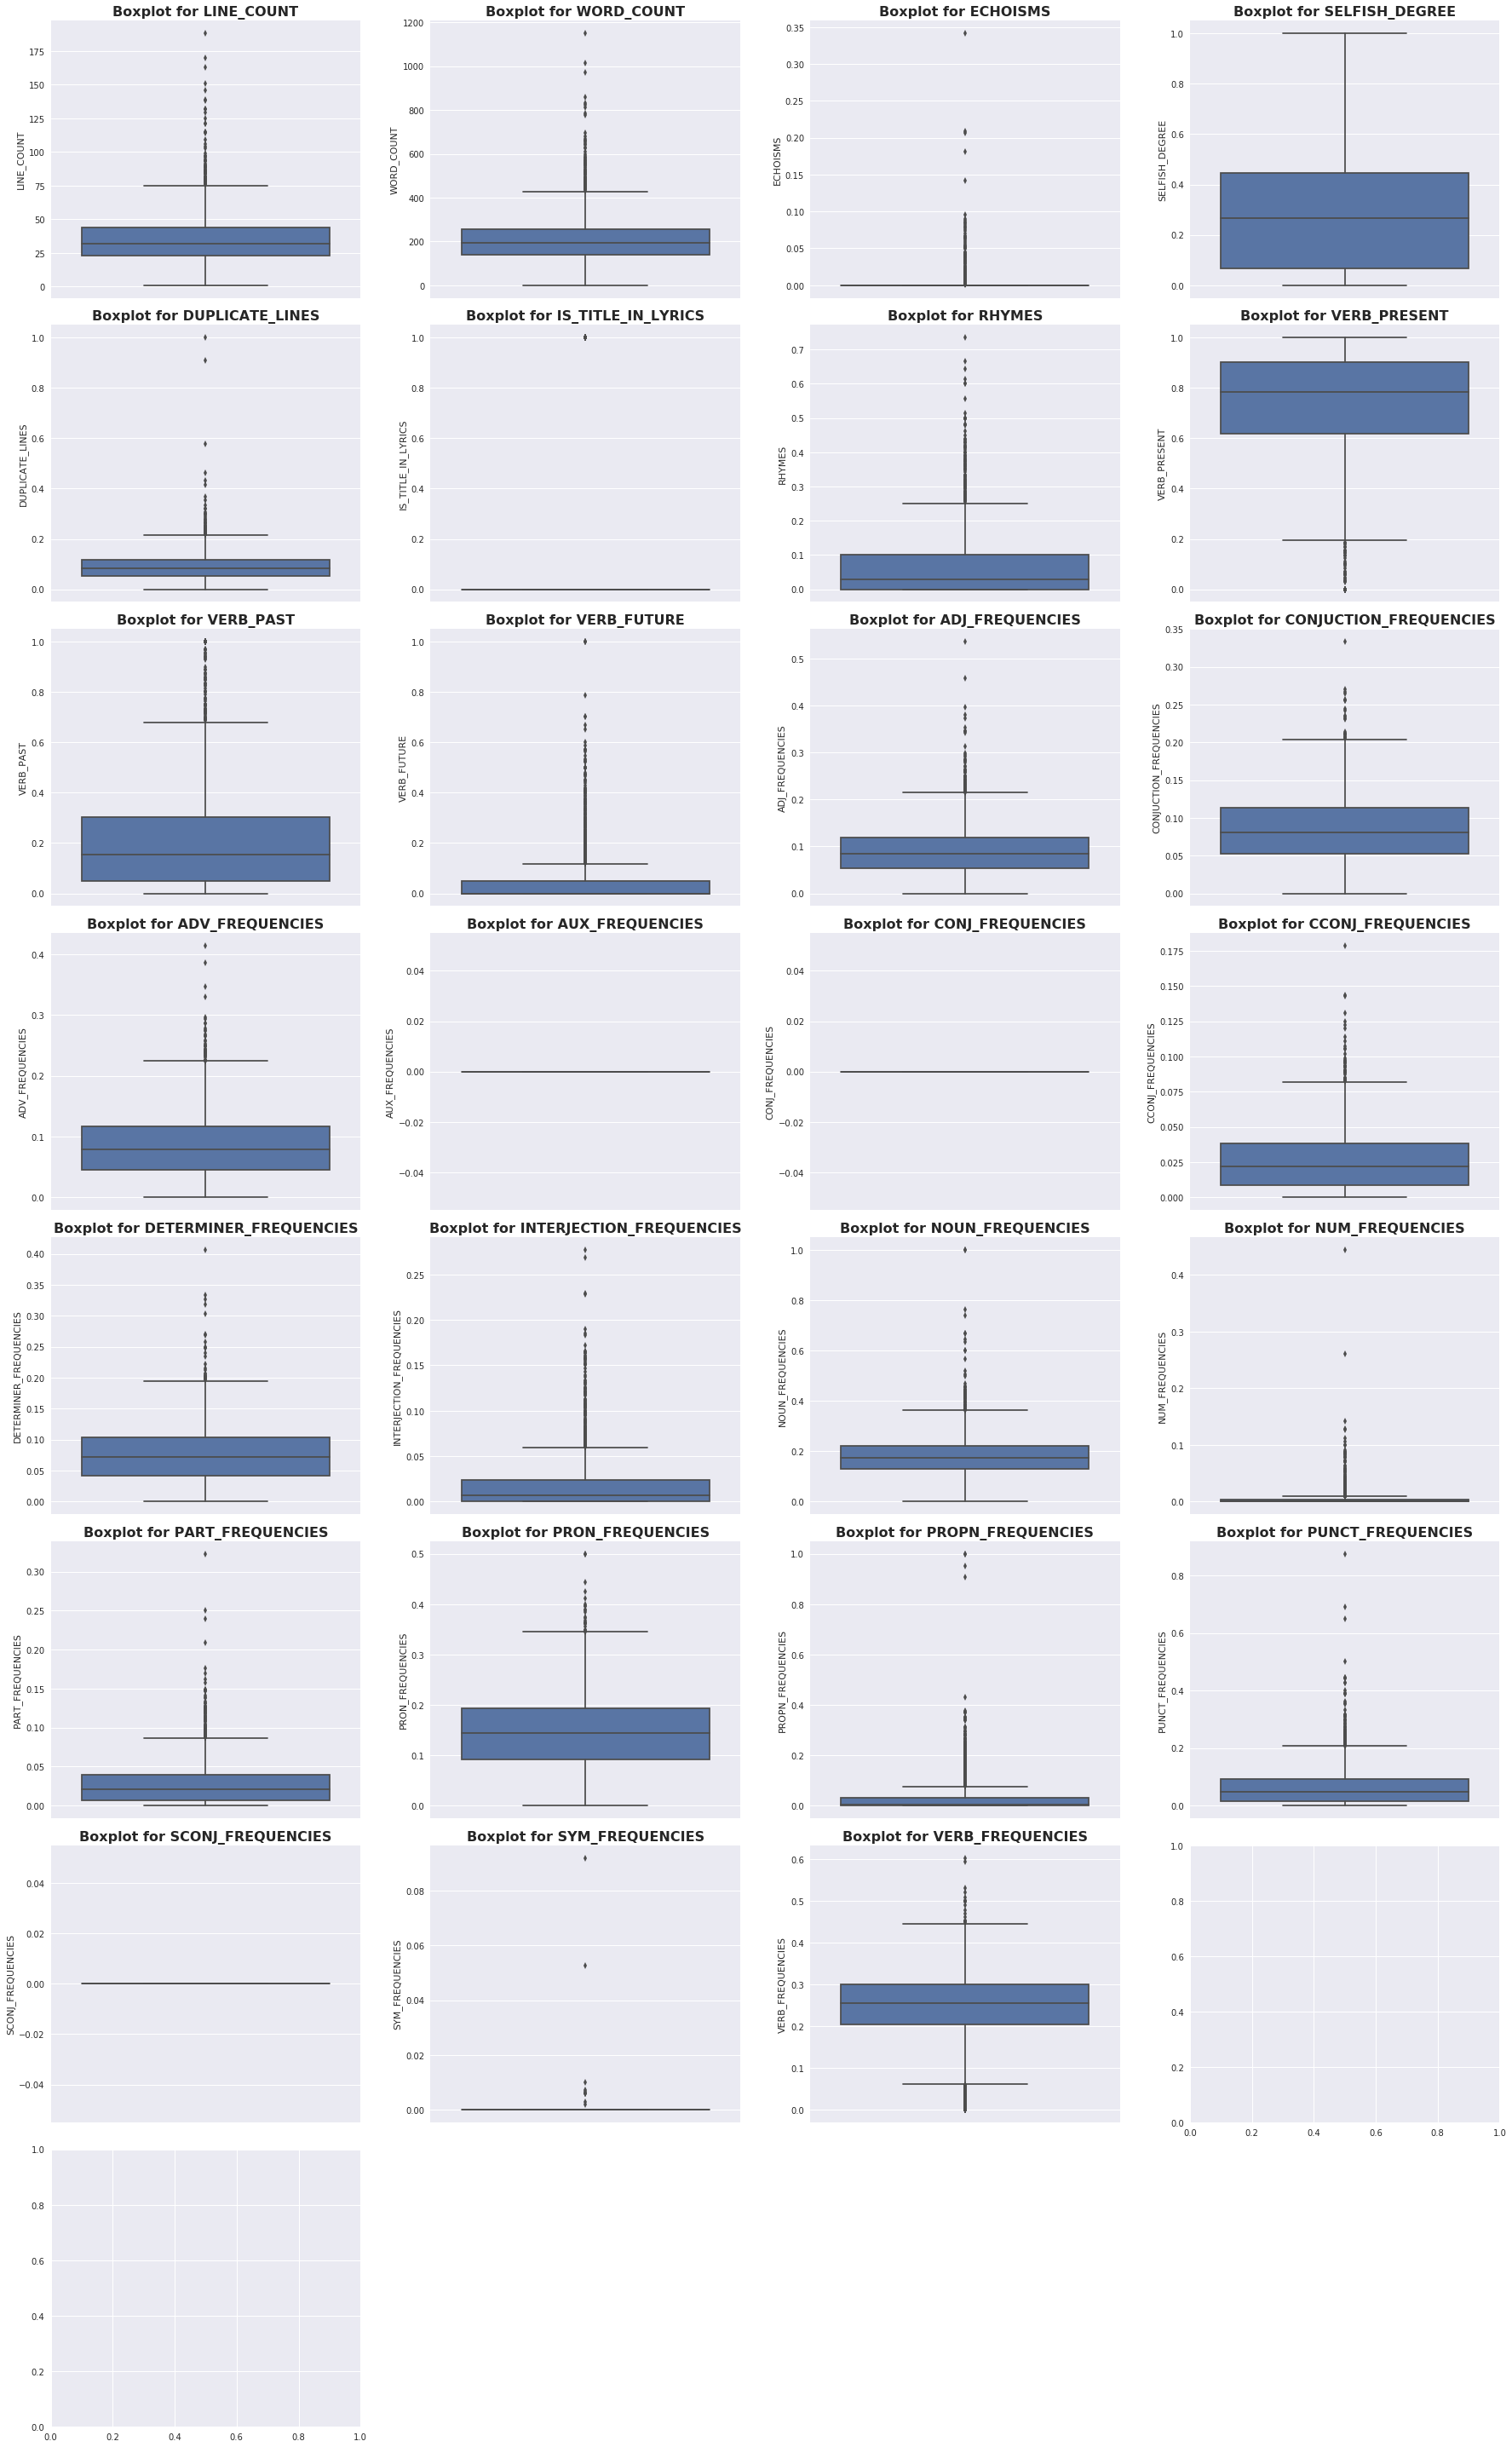

In [9]:
tmp_df = dataset.drop(useless_columns + ['LYRICS_VECTOR', 'TITLE_VECTOR'],axis=1)

f, axarr = plt.subplots(8, 4, figsize=(25,40))
k = 0
for feature in tmp_df.columns:
    (i, j) = divmod(k, 4)
    axarr[i,j] = sns.boxplot(y=tmp_df[feature], ax=axarr[i,j])
    axarr[i,j].set_title('Boxplot for {}'.format(feature), fontsize=16, weight='bold')
    k += 1
plt.tight_layout()
f.delaxes(axarr[-1,-1])
f.delaxes(axarr[-1,-2])
f.delaxes(axarr[-1,-3])

## Artificial Neural Network

In [ ]:
tmp_df = dataset.drop(useless_columns, axis=1)
X_vect = list()
for (i, row) in tmp_df.iterrows():
    sub_list = list()
    for field in row:
        if type(field) == str:
            field = field[1:-1].split()
            sub_list += [float(x.replace('\n','')) for x in field]
        else:
            sub_list.append(field)
    X_vect.append(np.array(sub_list))
X_vect = np.array(X_vect)

In [14]:
y = dataset['EMOTION'].as_matrix().T

In [15]:
print(X_vect.shape)
print(y.shape)

(2452, 627)
(2452,)


In [16]:
#1 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, random_state = 0)

#2 y_nn should be a vector (len(X_vect),4), with a 1 in the right class
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_nn = np_utils.to_categorical(encoded_Y)

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we need to scale because we don't want one feature to predomine the others
# Standardize features by removing the mean and scaling to unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using TensorFlow backend.


In [17]:
#1 Importing the Keras libraries and packages
import keras
# Sequential module is required to initialize our ANN
from keras.models import Sequential
# Dense module is required to create the layers
from keras.layers import Dense, Dropout
    
def build_ann(optimizer='adam', input_size=X_vect.shape[1]):
    classifier = Sequential()
    #2 Adding first hidden layer
    classifier.add(Dense(units = 60, kernel_initializer = 'random_normal', activation = 'sigmoid', input_dim = input_size))
    classifier.add(Dropout(0.5))
    
    #2 Adding second hidden layer
    classifier.add(Dense(units = 60, kernel_initializer = 'random_normal', activation = 'sigmoid', input_dim = input_size))
    classifier.add(Dropout(0.5))
   

    # Adding output layer
    classifier.add(Dense(units = 4, kernel_initializer = 'random_normal', activation = 'softmax'))

    #3 Compiling the ANN
    classifier.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return classifier

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_classifier = KerasClassifier(build_fn=build_ann)
parameters = {'batch_size': [256],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = keras_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_classifier = grid_search.best_estimator_
print('Accuracy: %0.2f' % (best_accuracy*100))
print('Best parameters', best_parameters)

Epoch 1/100
1764/1764 [==============================] - 0s 234us/step - loss: 1.3885 - acc: 0.2772
Epoch 2/100
1764/1764 [==============================] - 0s 26us/step - loss: 1.3759 - acc: 0.2999
Epoch 3/100
1764/1764 [==============================] - 0s 25us/step - loss: 1.3544 - acc: 0.3362
Epoch 4/100
1764/1764 [==============================] - 0s 25us/step - loss: 1.3279 - acc: 0.3747
Epoch 5/100
1764/1764 [==============================] - 0s 28us/step - loss: 1.2993 - acc: 0.4257
Epoch 6/100
1764/1764 [==============================] - 0s 29us/step - loss: 1.2653 - acc: 0.4705
Epoch 7/100
1764/1764 [==============================] - 0s 30us/step - loss: 1.2209 - acc: 0.5062
Epoch 8/100
1764/1764 [==============================] - 0s 28us/step - loss: 1.1750 - acc: 0.5215
Epoch 9/100
1764/1764 [==============================] - 0s 25us/step - loss: 1.1174 - acc: 0.5607
Epoch 10/100
1764/1764 [==============================] - 0s 26us/step - loss: 1.0663 - acc: 0.5709
Epoch 11

1764/1764 [==============================] - 0s 29us/step - loss: 0.1290 - acc: 0.9671
Epoch 84/100
1764/1764 [==============================] - 0s 29us/step - loss: 0.1424 - acc: 0.9609
Epoch 85/100
1764/1764 [==============================] - 0s 26us/step - loss: 0.1398 - acc: 0.9609
Epoch 86/100
1764/1764 [==============================] - 0s 26us/step - loss: 0.1331 - acc: 0.9598
Epoch 87/100
1764/1764 [==============================] - 0s 28us/step - loss: 0.1260 - acc: 0.9677
Epoch 88/100
1764/1764 [==============================] - 0s 27us/step - loss: 0.1245 - acc: 0.9626
Epoch 89/100
1764/1764 [==============================] - 0s 26us/step - loss: 0.1155 - acc: 0.9728
Epoch 90/100
1764/1764 [==============================] - 0s 28us/step - loss: 0.1284 - acc: 0.9603
Epoch 91/100
1764/1764 [==============================] - 0s 26us/step - loss: 0.1239 - acc: 0.9643
Epoch 92/100
1764/1764 [==============================] - 0s 27us/step - loss: 0.1189 - acc: 0.9654
Epoch 93/100


1765/1765 [==============================] - 0s 26us/step - loss: 0.1911 - acc: 0.9416
Epoch 66/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1824 - acc: 0.9467
Epoch 67/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.1804 - acc: 0.9467
Epoch 68/100
1765/1765 [==============================] - 0s 31us/step - loss: 0.1684 - acc: 0.9501
Epoch 69/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.1780 - acc: 0.9450
Epoch 70/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1646 - acc: 0.9496
Epoch 71/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1701 - acc: 0.9501
Epoch 72/100
1765/1765 [==============================] - 0s 33us/step - loss: 0.1796 - acc: 0.9490
Epoch 73/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.1695 - acc: 0.9564
Epoch 74/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1617 - acc: 0.9569
Epoch 75/100


1765/1765 [==============================] - 0s 27us/step - loss: 0.3071 - acc: 0.8992
Epoch 48/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.2940 - acc: 0.9139
Epoch 49/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.2716 - acc: 0.9173
Epoch 50/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.2832 - acc: 0.9207
Epoch 51/100
1765/1765 [==============================] - 0s 36us/step - loss: 0.2667 - acc: 0.9178
Epoch 52/100
1765/1765 [==============================] - 0s 32us/step - loss: 0.2683 - acc: 0.9190
Epoch 53/100
1765/1765 [==============================] - 0s 30us/step - loss: 0.2644 - acc: 0.9246
Epoch 54/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.2700 - acc: 0.9156
Epoch 55/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.2580 - acc: 0.9178
Epoch 56/100
1765/1765 [==============================] - 0s 30us/step - loss: 0.2391 - acc: 0.9320
Epoch 57/100


1765/1765 [==============================] - 0s 31us/step - loss: 0.4964 - acc: 0.8442
Epoch 29/100
1765/1765 [==============================] - 0s 30us/step - loss: 0.4744 - acc: 0.8572
Epoch 30/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.4660 - acc: 0.8567
Epoch 31/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.4395 - acc: 0.8720
Epoch 32/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.4226 - acc: 0.8816
Epoch 33/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.3996 - acc: 0.8867
Epoch 34/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.3980 - acc: 0.8878
Epoch 35/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.3869 - acc: 0.8833
Epoch 36/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.3675 - acc: 0.8924
Epoch 37/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.3625 - acc: 0.8924
Epoch 38/100


1765/1765 [==============================] - 0s 26us/step - loss: 1.0858 - acc: 0.5943
Epoch 11/100
1765/1765 [==============================] - 0s 28us/step - loss: 1.0244 - acc: 0.6181
Epoch 12/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.9717 - acc: 0.6391
Epoch 13/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.9147 - acc: 0.6550
Epoch 14/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.8731 - acc: 0.6754
Epoch 15/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.8343 - acc: 0.6924
Epoch 16/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.7834 - acc: 0.7292
Epoch 17/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.7592 - acc: 0.7450
Epoch 18/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.7282 - acc: 0.7530
Epoch 19/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.6928 - acc: 0.7705
Epoch 20/100


1765/1765 [==============================] - 0s 30us/step - loss: 0.1174 - acc: 0.9688
Epoch 93/100
1765/1765 [==============================] - 0s 31us/step - loss: 0.1083 - acc: 0.9700
Epoch 94/100
1765/1765 [==============================] - 0s 34us/step - loss: 0.1242 - acc: 0.9683
Epoch 95/100
1765/1765 [==============================] - 0s 32us/step - loss: 0.1050 - acc: 0.9739
Epoch 96/100
1765/1765 [==============================] - 0s 33us/step - loss: 0.1151 - acc: 0.9643
Epoch 97/100
1765/1765 [==============================] - 0s 34us/step - loss: 0.1118 - acc: 0.9677
Epoch 98/100
1765/1765 [==============================] - 0s 32us/step - loss: 0.1121 - acc: 0.9677
Epoch 99/100
1765/1765 [==============================] - 0s 33us/step - loss: 0.1066 - acc: 0.9705
Epoch 100/100
1765/1765 [==============================] - 0s 33us/step - loss: 0.1030 - acc: 0.9711
Epoch 1/100
1765/1765 [==============================] - 0s 258us/step - loss: 1.4119 - acc: 0.2601
Epoch 2/100


1765/1765 [==============================] - 0s 26us/step - loss: 0.1701 - acc: 0.9456
Epoch 75/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1583 - acc: 0.9541
Epoch 76/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.1623 - acc: 0.9496
Epoch 77/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.1405 - acc: 0.9564
Epoch 78/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1643 - acc: 0.9456
Epoch 79/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1478 - acc: 0.9637
Epoch 80/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1416 - acc: 0.9626
Epoch 81/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1617 - acc: 0.9564
Epoch 82/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1432 - acc: 0.9484
Epoch 83/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1483 - acc: 0.9564
Epoch 84/100


1765/1765 [==============================] - 0s 24us/step - loss: 0.2221 - acc: 0.9331
Epoch 56/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.2164 - acc: 0.9365
Epoch 57/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.2066 - acc: 0.9326
Epoch 58/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.2035 - acc: 0.9416
Epoch 59/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.1949 - acc: 0.9450
Epoch 60/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1918 - acc: 0.9405
Epoch 61/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.1895 - acc: 0.9467
Epoch 62/100
1765/1765 [==============================] - 0s 23us/step - loss: 0.1917 - acc: 0.9450
Epoch 63/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.1850 - acc: 0.9467
Epoch 64/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.1646 - acc: 0.9530
Epoch 65/100


1765/1765 [==============================] - 0s 30us/step - loss: 0.3291 - acc: 0.9031
Epoch 38/100
1765/1765 [==============================] - 0s 24us/step - loss: 0.3241 - acc: 0.9071
Epoch 39/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.3053 - acc: 0.9127
Epoch 40/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.2962 - acc: 0.9139
Epoch 41/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.2947 - acc: 0.9150
Epoch 42/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.2778 - acc: 0.9201
Epoch 43/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.2778 - acc: 0.9184
Epoch 44/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.2628 - acc: 0.9167
Epoch 45/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.2603 - acc: 0.9309
Epoch 46/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.2770 - acc: 0.9099
Epoch 47/100


1765/1765 [==============================] - 0s 26us/step - loss: 0.7026 - acc: 0.7632
Epoch 20/100
1765/1765 [==============================] - 0s 28us/step - loss: 0.6646 - acc: 0.7779
Epoch 21/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.6335 - acc: 0.7892
Epoch 22/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.6114 - acc: 0.8034
Epoch 23/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.5847 - acc: 0.8108
Epoch 24/100
1765/1765 [==============================] - 0s 34us/step - loss: 0.5496 - acc: 0.8340
Epoch 25/100
1765/1765 [==============================] - 0s 32us/step - loss: 0.5440 - acc: 0.8266
Epoch 26/100
1765/1765 [==============================] - 0s 35us/step - loss: 0.5260 - acc: 0.8340
Epoch 27/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.5047 - acc: 0.8408
Epoch 28/100
1765/1765 [==============================] - 0s 26us/step - loss: 0.4829 - acc: 0.8442
Epoch 29/100


1765/1765 [==============================] - 1s 334us/step - loss: 1.4025 - acc: 0.2674
Epoch 2/100
1765/1765 [==============================] - 0s 32us/step - loss: 1.3657 - acc: 0.3105
Epoch 3/100
1765/1765 [==============================] - 0s 29us/step - loss: 1.3464 - acc: 0.3422
Epoch 4/100
1765/1765 [==============================] - 0s 31us/step - loss: 1.3369 - acc: 0.3711
Epoch 5/100
1765/1765 [==============================] - 0s 26us/step - loss: 1.3017 - acc: 0.4176
Epoch 6/100
1765/1765 [==============================] - 0s 26us/step - loss: 1.2714 - acc: 0.4731
Epoch 7/100
1765/1765 [==============================] - 0s 26us/step - loss: 1.2295 - acc: 0.5065
Epoch 8/100
1765/1765 [==============================] - 0s 27us/step - loss: 1.1754 - acc: 0.5609
Epoch 9/100
1765/1765 [==============================] - 0s 27us/step - loss: 1.1244 - acc: 0.5847
Epoch 10/100
1765/1765 [==============================] - 0s 27us/step - loss: 1.0657 - acc: 0.6130
Epoch 11/100
1765/17

1765/1765 [==============================] - 0s 27us/step - loss: 0.1241 - acc: 0.9632
Epoch 83/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.1364 - acc: 0.9620
Epoch 84/100
1765/1765 [==============================] - 0s 25us/step - loss: 0.1336 - acc: 0.9598
Epoch 85/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1315 - acc: 0.9615
Epoch 86/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1220 - acc: 0.9666
Epoch 87/100
1765/1765 [==============================] - 0s 35us/step - loss: 0.1119 - acc: 0.9654
Epoch 88/100
1765/1765 [==============================] - 0s 34us/step - loss: 0.1161 - acc: 0.9666
Epoch 89/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1177 - acc: 0.9666
Epoch 90/100
1765/1765 [==============================] - 0s 27us/step - loss: 0.1133 - acc: 0.9643
Epoch 91/100
1765/1765 [==============================] - 0s 29us/step - loss: 0.1047 - acc: 0.9768
Epoch 92/100


1961/1961 [==============================] - 0s 25us/step - loss: 0.1792 - acc: 0.9429
Epoch 65/100
1961/1961 [==============================] - 0s 26us/step - loss: 0.1787 - acc: 0.9449
Epoch 66/100
1961/1961 [==============================] - 0s 27us/step - loss: 0.1723 - acc: 0.9449
Epoch 67/100
1961/1961 [==============================] - 0s 24us/step - loss: 0.1740 - acc: 0.9454
Epoch 68/100
1961/1961 [==============================] - 0s 24us/step - loss: 0.1794 - acc: 0.9505
Epoch 69/100
1961/1961 [==============================] - 0s 25us/step - loss: 0.1736 - acc: 0.9459
Epoch 70/100
1961/1961 [==============================] - 0s 24us/step - loss: 0.1575 - acc: 0.9500
Epoch 71/100
1961/1961 [==============================] - 0s 26us/step - loss: 0.1545 - acc: 0.9602
Epoch 72/100
1961/1961 [==============================] - 0s 25us/step - loss: 0.1526 - acc: 0.9582
Epoch 73/100
1961/1961 [==============================] - 0s 25us/step - loss: 0.1574 - acc: 0.9510
Epoch 74/100


In [19]:
classifier = build_ann('adam')
classifier.fit(X_train, y_nn, batch_size = 256, epochs = 100, verbose=0)
y_pred = classifier.predict(X_test)


y_pred1 = np.argmax(y_pred,axis=1)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_nn_pred = np_utils.to_categorical(encoded_Y)
cm = confusion_matrix(y_pred1, y_nn_pred.argmax(axis=1))
accuracy = (sum([cm[i,i] for i in range(len(cm))])) / len(y_nn_pred)
print('Accuracy: %0.2f' % (accuracy*100))

Accuracy: 84.52


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

[[ 87   5   0  14]
 [  2 154  11   1]
 [  3   6  88   6]
 [ 15   3   9  87]]
Accuracy of logistic regression classifier on test set: 0.85


## SVM 

In [21]:
def parameters_grid_search(classifier, params, x, y, cv=10, verbose=False):
    """
    Grid Search to find best parameters for a certain classifier whose
    performances are evaluated using cross-validation
    """
    gs = GridSearchCV(classifier(), params, cv=cv, n_jobs=-1, verbose=verbose)
    gs.fit(x, y)    
    return (gs.best_estimator_, gs.best_params_)

In [ ]:
from sklearn.svm import SVC

# Build model
clf = SVC()
# Define the set of parameters we want to test on
params = [
    { 'kernel': ['linear'], 'C': [ 1 ]},
    { 'kernel': ['rbf', 'sigmoid'], 'C': [ 0.1, 1 ] }
]

# Perform grid search
svm_best, best_params = parameters_grid_search(SVC, params, X_vect, y, verbose=1)
print('Parameters:', best_params)
scores = cross_val_score(svm_best, X_vect, y, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 20.5min finished


Parameters: {'C': 1, 'kernel': 'linear'}


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Build model
clf = GradientBoostingClassifier(learning_rate=0.7, n_estimators=200)
# Evaluate accuracy
scores = cross_val_score(clf, X_vect, y, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

In [82]:
"""
def xgb_evaluate(max_depth,
                  learning_rate,
                  n_estimators,
                  gamma,
                  min_child_weight,
                  max_delta_step,
                  subsample,
                  colsample_bytree,
                  silent=True,
                  nthread=-1):

    cv = cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree),
                           X_vect,
                           y,
                           "accuracy",
                           cv=5).mean()
    print(cv)
    return cv
"""
def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-mae-mean'].values[-1]

In [84]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from bayes_opt import BayesianOptimization
"""
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y_train)
y_xgb = np_utils.to_categorical(encoded_Y)
"""

y = dataset.EMOTION.astype("category").cat.codes

xgtrain = xgb.DMatrix(X_vect, label=y)

num_rounds = 3000
random_state = 2016
num_iter = 1
init_points = 5
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'mae',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (5, 15),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 10),
                                            'alpha': (0, 10),
                                            })


xgbBO.maximize()
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.


KeyboardInterrupt: 